In [2]:
from functions import *
from architectures import *

%load_ext autoreload
%autoreload 2

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


##   Scaling X and y

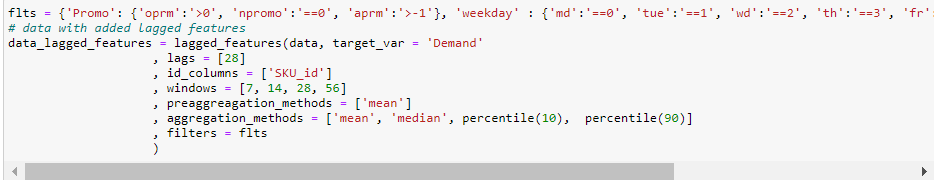

In [4]:
data_lagged_features = pd.read_csv('sku.csv')

In [5]:
df_train, df_test, target_mean, target_stdev, target, features = preprocess(data_lagged_features)

In [4]:
set_random_seed(7)

In [5]:
batch_size = 128
sequence_length = 30

train_dataset = SequenceDataset(
    df_train,
    target=target,
    features=features,
    sequence_length=sequence_length
)
test_dataset = SequenceDataset(
    df_test,
    target=target,
    features=features,
    sequence_length=sequence_length
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)
train_eval_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

X, y = next(iter(train_loader))

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: torch.Size([128, 30, 390])
Target shape: torch.Size([128])


In [6]:
params = {
    'learning_rate' : 1e-3,
    'weight_decay' : 1e-5,
    'num_hidden_units' : 64,
    'loss_function' : nn.L1Loss(),
    'gamma' : 0,
    'shape' : data_lagged_features.shape,
    'epochs' : 3
}

model = ShallowRegressionLSTM(num_sensors=len(features), hidden_units=params['num_hidden_units'])
loss_function = params['loss_function']
optimizer = torch.optim.Adam(model.parameters(), lr=params['learning_rate'], weight_decay=params['weight_decay'])
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=params['gamma'])

In [7]:
epochs = params['epochs']

train(df_train, epochs, train_loader, train_eval_loader,model,
      loss_function, optimizer, scheduler, batch_size, target_mean, target_stdev)

Epoch 0
---------


100%|███████████████████████████████████████████████████████████████████████| 651/651 [01:07<00:00,  9.65it/s]


Train loss: 0.332591928690443


100%|███████████████████████████████████████████████████████████████████████| 651/651 [00:34<00:00, 18.98it/s]


Smape = 101.33115223446374

Epoch 1
---------


100%|███████████████████████████████████████████████████████████████████████| 651/651 [01:18<00:00,  8.28it/s]


Train loss: 0.2906103754235852


100%|███████████████████████████████████████████████████████████████████████| 651/651 [00:29<00:00, 21.97it/s]


Smape = 90.94527701841064

Epoch 2
---------


100%|███████████████████████████████████████████████████████████████████████| 651/651 [01:07<00:00,  9.65it/s]


Train loss: 0.2907898191894804


100%|███████████████████████████████████████████████████████████████████████| 651/651 [00:29<00:00, 22.32it/s]

Smape = 92.73393867292727



In [8]:
df_out = get_df_out(model, df_train, df_test, train_eval_loader, test_loader, target, target_mean, target_stdev)
ans = get_submission('test_kaggle.csv', df_out)

100%|█████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00,  6.60it/s]


In [9]:
ans.to_csv('submission_sku.csv', index_label='id')

<AxesSubplot:xlabel='Date'>

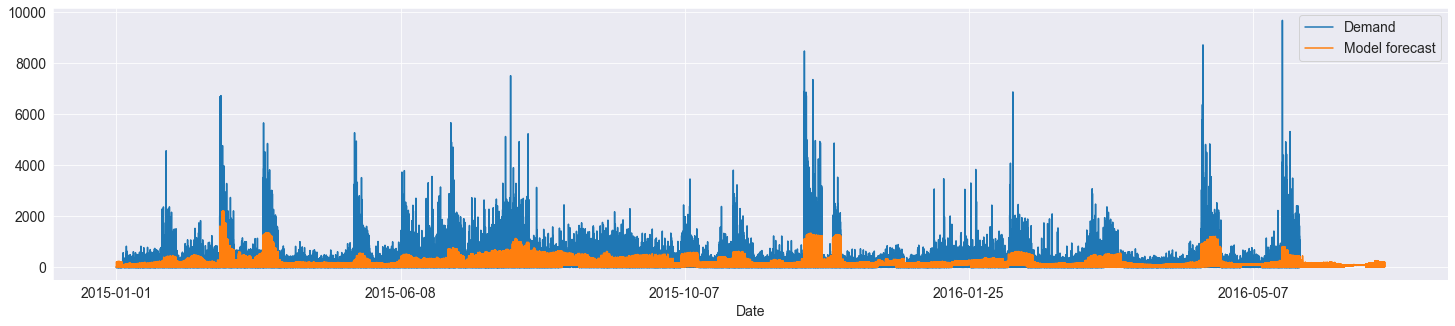

In [10]:
df_out.reset_index().drop(['Store_id', 'SKU_id'], axis=1).set_index('Date').sort_index().plot()

https://www.kaggle.com/c/atsf-fall21-hw3

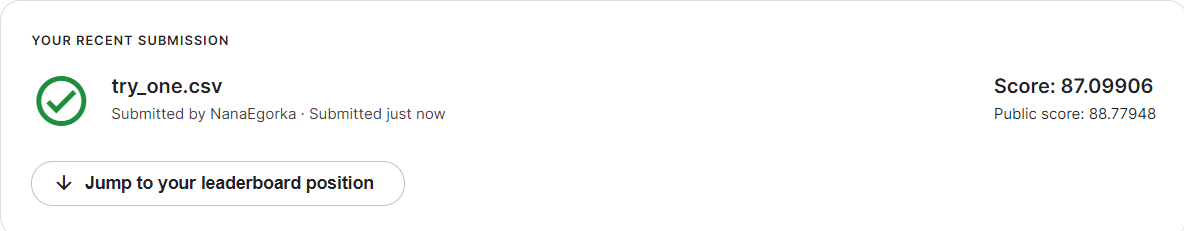

## Scaling X only

In [13]:
df_train, df_test, target_mean, target_stdev, target, features = preprocess(data_lagged_features, scl=1)

In [15]:
set_random_seed(7)

In [16]:
batch_size = 128
sequence_length = 30

train_dataset = SequenceDataset(
    df_train,
    target=target,
    features=features,
    sequence_length=sequence_length
)
test_dataset = SequenceDataset(
    df_test,
    target=target,
    features=features,
    sequence_length=sequence_length
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)
train_eval_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

X, y = next(iter(train_loader))

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: torch.Size([128, 30, 391])
Target shape: torch.Size([128])


In [17]:
params = {
    'learning_rate' : 1e-3,
    'weight_decay' : 1e-5,
    'num_hidden_units' : 64,
    'loss_function' : nn.L1Loss(),
    'gamma' : 0,
    'shape' : data_lagged_features.shape,
    'epochs' : 3
}

model = ShallowRegressionLSTM(num_sensors=len(features), hidden_units=params['num_hidden_units'])
loss_function = params['loss_function']
optimizer = torch.optim.Adam(model.parameters(), lr=params['learning_rate'], weight_decay=params['weight_decay'])
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=params['gamma'])

In [18]:
epochs = params['epochs']

train(df_train, epochs, train_loader, train_eval_loader,model,
      loss_function, optimizer, scheduler, batch_size, target_mean, target_stdev)

Epoch 0
---------


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [01:14<00:00,  8.78it/s]


Train loss: 179.52143092236028


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [00:35<00:00, 18.38it/s]


Smape = 103.31725985381125

Epoch 1
---------


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [01:12<00:00,  8.92it/s]


Train loss: 148.49222783851917


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [00:30<00:00, 21.52it/s]


Smape = 103.96303261131479

Epoch 2
---------


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [01:11<00:00,  9.08it/s]


Train loss: 148.51169316633138


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [00:36<00:00, 17.63it/s]

Smape = 127.88408724709053



In [19]:
df_out = get_df_out(model, df_train, df_test, train_eval_loader, test_loader, target, target_mean, target_stdev)
ans = get_submission('test_kaggle.csv', df_out)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00,  6.10it/s]


In [20]:
ans.to_csv('ans.csv', index_label='id')

<AxesSubplot:xlabel='Date'>

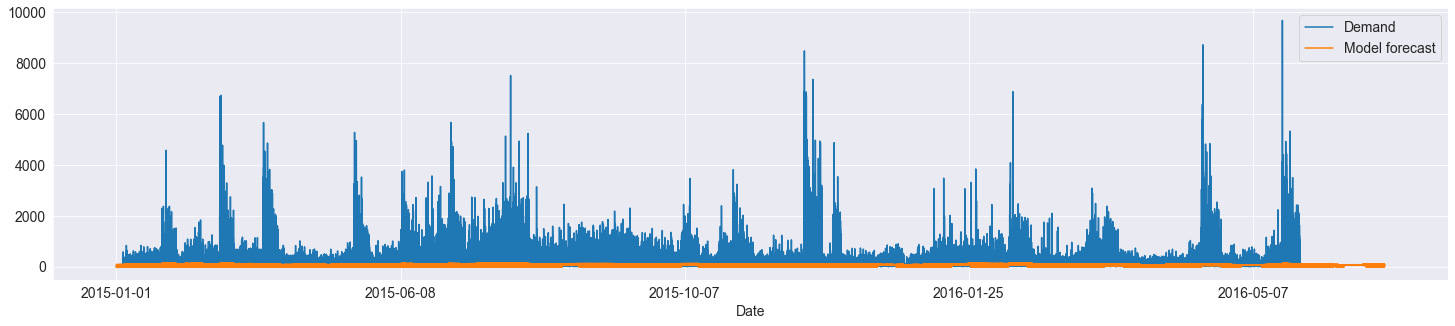

In [21]:
df_out.reset_index().drop(['Store_id', 'SKU_id'], axis=1).set_index('Date').sort_index().plot()

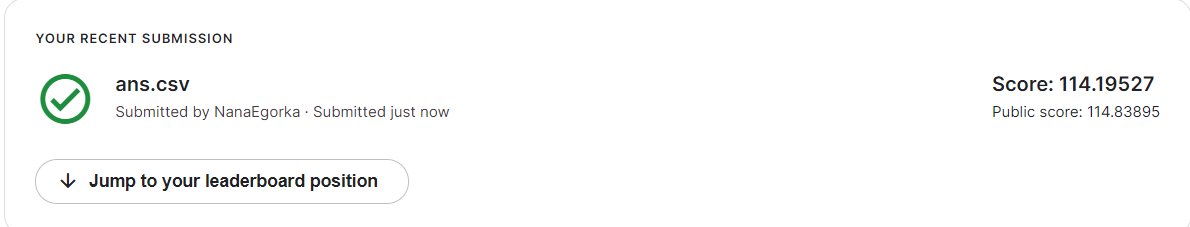

## No scale

In [25]:
df_train, df_test, target_mean, target_stdev, target, features = preprocess(data_lagged_features, scl=0)

In [26]:
set_random_seed(7)

In [27]:
batch_size = 128
sequence_length = 30

train_dataset = SequenceDataset(
    df_train,
    target=target,
    features=features,
    sequence_length=sequence_length
)
test_dataset = SequenceDataset(
    df_test,
    target=target,
    features=features,
    sequence_length=sequence_length
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)
train_eval_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

X, y = next(iter(train_loader))

print("Features shape:", X.shape)
print("Target shape:", y.shape)++

SyntaxError: invalid syntax (<ipython-input-27-929f661bfead>, line 24)

In [ ]:
params = {
    'learning_rate' : 1e-3,
    'weight_decay' : 1e-5,
    'num_hidden_units' : 64,
    'loss_function' : nn.L1Loss(),
    'gamma' : 0,
    'shape' : data_lagged_features.shape,
    'epochs' : 3
}

model = ShallowRegressionLSTM(num_sensors=len(features), hidden_units=params['num_hidden_units'])
loss_function = params['loss_function']
optimizer = torch.optim.Adam(model.parameters(), lr=params['learning_rate'], weight_decay=params['weight_decay'])
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=params['gamma'])

In [28]:
epochs = params['epochs']

train(df_train, epochs, train_loader, train_eval_loader,model,
      loss_function, optimizer, scheduler, batch_size, target_mean, target_stdev)

Epoch 0
---------


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [01:19<00:00,  8.18it/s]


Train loss: 148.53594037830922


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [00:36<00:00, 17.74it/s]


Smape = 121.13984165079529

Epoch 1
---------


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [01:21<00:00,  7.97it/s]


Train loss: 148.53586859637142


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [00:37<00:00, 17.57it/s]


Smape = 124.98811326546435

Epoch 2
---------


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [01:22<00:00,  7.91it/s]


Train loss: 148.50149904125115


100%|████████████████████████████████████████████████████████████████████████████████| 651/651 [00:36<00:00, 17.66it/s]

Smape = 114.66817139617329



In [29]:
df_out = get_df_out(model, df_train, df_test, train_eval_loader, test_loader, target, target_mean, target_stdev)
ans = get_submission('test_kaggle.csv', df_out)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  5.17it/s]


In [39]:
ans.to_csv('ans.csv', index_label='id')

<AxesSubplot:xlabel='Date'>

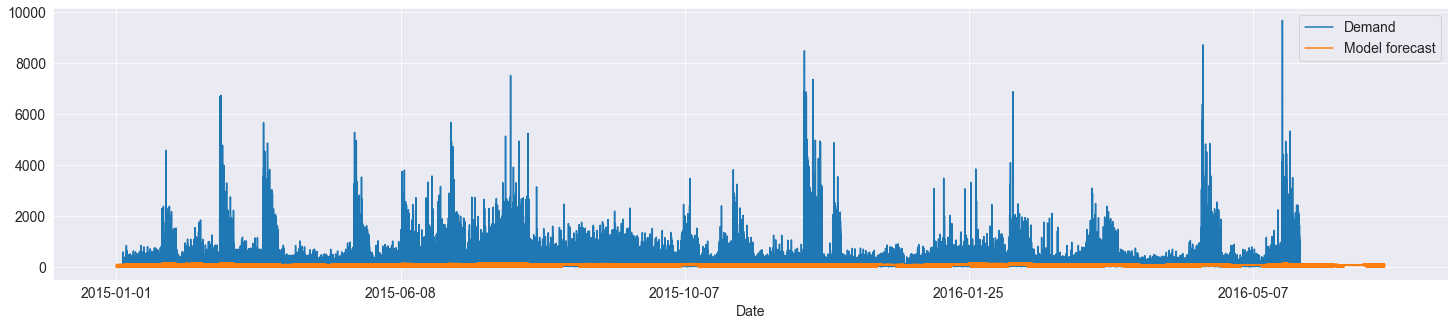

In [31]:
df_out.reset_index().drop(['Store_id', 'SKU_id'], axis=1).set_index('Date').sort_index().plot()

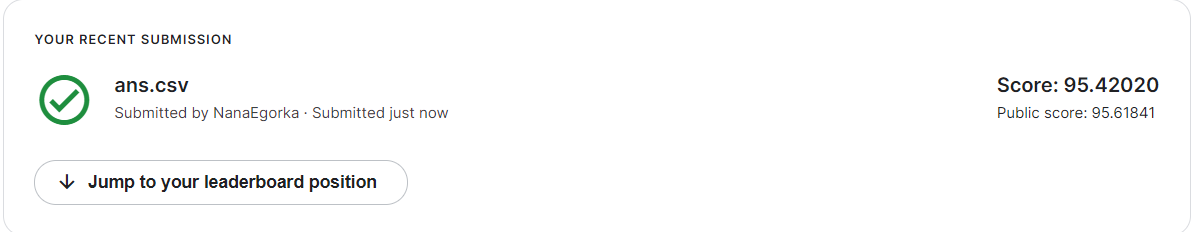